# CREDIT CARD FRAUD DETECTION 

## Introduction to Credit Card Fraud Detection
Credit card fraud poses a significant threat to both financial institutions and cardholders, leading to substantial financial losses and potential harm to individuals. In response to this challenge, advanced technologies and machine learning techniques have been employed to develop robust fraud detection systems.



## The Importance of Fraud Detection

#### Financial Loss Prevention: 
Fraudulent transactions result in financial losses for both credit card companies and their customers. Early detection allows for prompt action to mitigate these losses.

#### Customer Trust and Satisfaction:
Rapid detection and response to fraud contribute to maintaining customer trust. Prompt resolution of fraudulent activities enhances overall customer satisfaction.

#### Regulatory Compliance:
Financial institutions are subject to various regulations aimed at protecting consumers. Implementing effective fraud detection systems helps ensure compliance with these regulations.

## Dataset Overview:

The dataset comprises simulated credit card transactions, encompassing both genuine and fraudulent activities. The data is presented in CSV format, sourced from the Kaggle public dataset. Generated using the Sparkov Data Generation tool developed by Brandon Harris, the dataset spans from January 1, 2019, to December 31, 2020.

### Key Characteristics:

#### Transaction Volume: 
Approximately 1.3 million transactions are recorded in the dataset, involving 1000 customers and 800 merchants.

#### Features:
The dataset incorporates 21 features, providing diverse insights into each transaction. Key features include cc_num (credit card number), merchant, category, amount, gender, city_population, job, date of birth, is_fraud, city, state, zip, and others.


## Features in the Dataset:

1. trans_date_trans_time: Date and time of the transaction.
2. cc_num: Credit card number (potentially masked for privacy).

3. merchant: Name or identifier of the merchant involved.

4. category: Categorization of the transaction (e.g., retail, dining).

5. amt: Transaction amount.

6. gender: Gender of the cardholder.

7. city_pop: Population of the city where the cardholder is located.

8. job: Occupation or job of the cardholder.

9. dob: Date of birth of the cardholder.

10. is_fraud: Binary indicator (0 or 1) for fraudulent transactions.

### These features play a crucial role in understanding and analyzing the dataset. They include transaction details, cardholder demographics, and a key indicator for fraud detection. Exploring relationships and patterns within these features is essential for deriving meaningful insights and building effective machine learning models.

11. first and last: The first and last name of the cardholder, providing personal identification details.

12. street: Street address of the cardholder, contributing to location specifics.

13. city, state, zip: Geographic details of the cardholder's residence, offering a comprehensive location profile.

14. lat and long: Latitude and longitude coordinates of the cardholder's and merchant's locations, enabling spatial analysis.

15. trans_num: Transaction number or identifier, aiding in unique transaction identification.

16. unix_time: Transaction time represented in Unix timestamp format, facilitating time-based analysis.

17. merch_lat and merch_long: Latitude and longitude coordinates of the merchant's location, essential for understanding transaction geographics.

### These additional columns provide detailed information about the cardholder's residence, transaction-specific identifiers, and geographical  coordinates crucial for spatial analysis. Including these features in your analysis can contribute to a more comprehensive understanding of the dataset.



# Determining the objective
### Problem statement:

.Credit card fraud detection is an immenent problem to every company in the banking industry. Detecting and preventing credit card fraud is a necessity for banks.

.Hence, our objective here is to develop a machine learning model that detects fraudulent transactions based on the historical transactional data of customers with a pool of merchants and provide a cost benefit analysis of the model to the stakeholders and provide them with appropriate recommendations to adopt in order to mitigate fraud risks.

# READING THE FILE 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px

#Sampling methods
from sklearn.model_selection import train_test_split, cross_val_score
#Oversamplying
from imblearn.over_sampling import RandomOverSampler

#feature engineering
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

#Feature Selection
from boruta import BorutaPy

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
crd = pd.read_csv(r"C:\Users\khima\Desktop\fraudTrain.csv")
crd_test = pd.read_csv(r"C:\Users\khima\Desktop\fraudTest.csv")

In [3]:
crd.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [4]:
crd_test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [5]:
print(f"Train Dataset shape: {crd.shape}")

Train Dataset shape: (1296675, 23)


In [6]:
print(f"Test Dataset shape: {crd_test.shape}")

Test Dataset shape: (555719, 23)


In [7]:
print("Train Column names:", crd.columns.tolist())

Train Column names: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [8]:
print("Test Column names:", crd_test.columns.tolist())

Test Column names: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [9]:
print("Data types:\n", crd.dtypes)
print("Test - Data types:\n", crd_test.dtypes)

Data types:
 Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object
Test - Data types:
 Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      floa

In [10]:
print("Summary statistics:\n", crd.describe())

Summary statistics:
          Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e

## Summary Statistics Interpretation:

### Transaction Amount (amt):

The transaction amounts vary widely, ranging from 1 to 28,948.90 USD.
The mean transaction amount is 70.35 USD, with a standard deviation of 160.32 USD.
Notably, 75% of transactions have amounts below 83.14 USD.
### ZIP Code (zip):

ZIP codes exhibit diverse values, with a mean of 48,800.07.
Transactions span various geographical locations based on ZIP codes.
### Geographic Coordinates (lat and long):

Latitude (lat) and longitude (long) represent cardholders' locations.
The mean latitude is approximately 38.54, and the mean longitude is about -90.23.
These coordinates demonstrate a broad geographical spread of transactions.
### City Population (city_pop):

City populations vary significantly, with a mean of 88,824.44 and a maximum of 2,906,700.
### Transaction Time (unix_time):

Transaction times span from January 1, 2019, to December 31, 2020, in Unix timestamp format.
### Merchant Coordinates (merch_lat and merch_long):

Latitude and longitude for merchants show similar mean values to cardholders.
### Fraud Indicator (is_fraud):

The dataset indicates a binary fraud indicator (0 or 1).
The mean fraud rate is approximately 0.58%, suggesting a class imbalance.
75% of transactions are non-fraudulent (is_fraud = 0), and the maximum fraud rate is 100%.
### Overall:

The dataset provides a comprehensive view of transaction characteristics.
Class imbalance in the fraud indicator needs attention during model development.
Geographic spread and transaction amounts vary widely, requiring consideration in fraud detection strategies.
Further exploratory data analysis (EDA) and visualization can uncover additional insights and patterns in the data.

In [11]:
# Check for missing values
print("Missing values:\n", crd.isnull().sum())
print("Missing values:\n", crd_test.isnull().sum())

Missing values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Missing values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip     

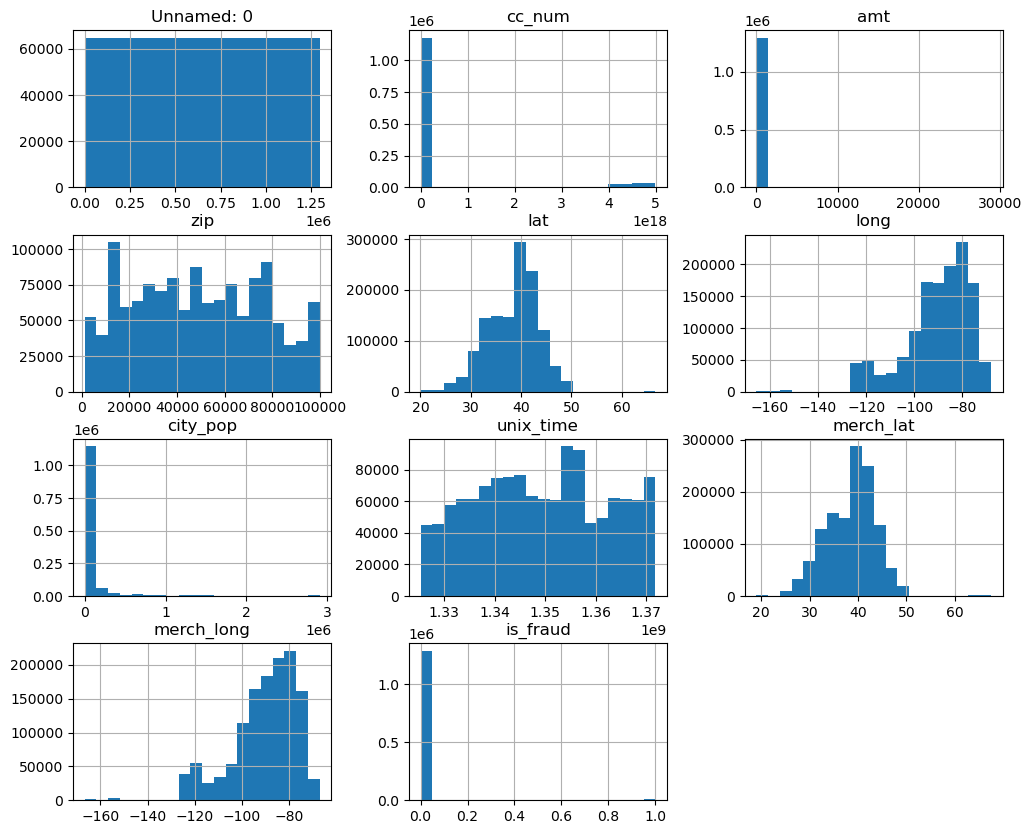

In [12]:
import matplotlib.pyplot as plt

crd.hist(figsize=(12, 10), bins=20)
plt.show()

In [13]:
# Describe numerical features
print(crd["amt"].describe())
print(crd["city_pop"].describe())

# Count unique values for categorical features
print(crd["merchant"].value_counts())
print(crd["category"].value_counts())

# Analyze fraudulent vs. non-fraudulent transactions
fraudulent_transactions = crd[crd["is_fraud"] == 1]
non_fraudulent_transactions = crd[crd["is_fraud"] == 0]

print(fraudulent_transactions["amt"].describe())
print(non_fraudulent_transactions["amt"].describe())


count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64
count    1.296675e+06
mean     8.882444e+04
std      3.019564e+05
min      2.300000e+01
25%      7.430000e+02
50%      2.456000e+03
75%      2.032800e+04
max      2.906700e+06
Name: city_pop, dtype: float64
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64
gas_transport     131659
grocery_pos       123638
home

### Transaction Amount (amt):

=>There is a wide range of transaction amounts, with a minimum of 1 and a maximum of 28,948.90.

=>The average transaction amount is 70.35, with a standard deviation of 160.32.

=>The median (50th percentile) transaction amount is 47.52.

### City Population (city_pop):

.The city population associated with transactions also varies significantly.

.The average city population is 88,824, with a standard deviation of 301,956.

.The minimum city population is 23, and the maximum is 2,906,700.

### Merchant Information:

.The data includes transactions from various merchants, with the highest frequency from "fraud_Kilback LLC" (4403 occurrences).

.There are 693 unique merchants in the dataset.

### Transaction Categories:

.The data includes transactions across different categories, with the highest frequency in "gas_transport" (131,659 occurrences).

.The "travel" category has the fewest transactions (40,507 occurrences).

### Specific Transaction Amount Subset:

.In a subset with 7,506 entries, the transaction amount ranges from 1.06 to 1,376.04.

.The average transaction amount in this subset is 531.32, with a standard deviation of 390.56.

### Comparison of Two Transaction Amount Columns:

.There are two columns named "amt," with slightly different statistics.

.In the first subset of 1,296,675 entries, the max transaction amount is 28,948.90.

.In the second subset of 1,289,169 entries, the max transaction amount is the same but is reported with less precision (28,948).

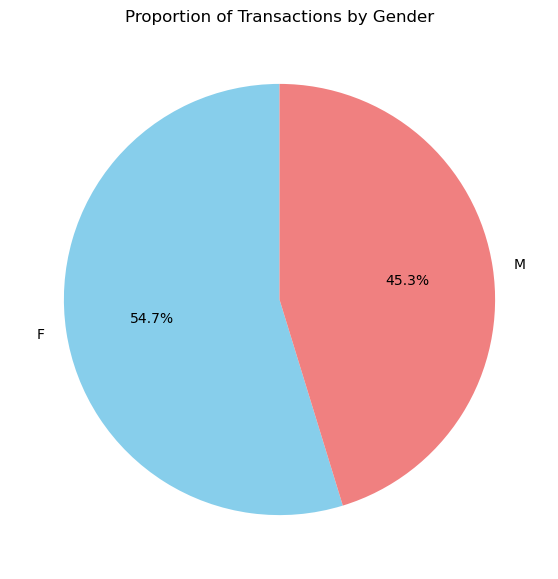

In [14]:
# Count the number of transactions for each gender
gender_counts = crd['gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Transactions by Gender')
plt.show()


The pie chart illustrates the distribution of transactions based on gender. Females ('F') account for approximately 54.7% of the transactions, while males ('M') make up the remaining 45.3%. This suggests that there is a slightly higher representation of female customers in the dataset compared to males."

In this context, the percentages represent the proportion of transactions associated with each gender category in crd dataset.

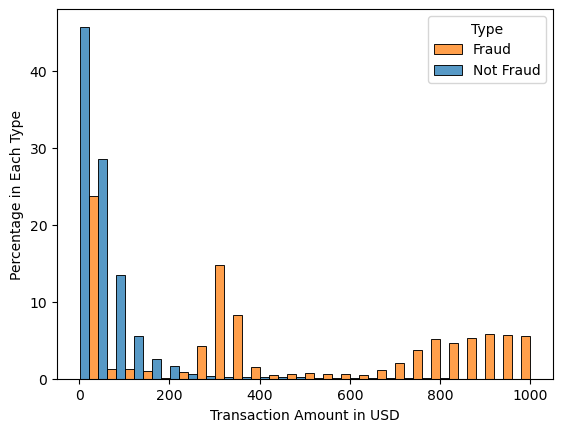

In [15]:
#amount vs fraud
ax=sns.histplot(x='amt',data=crd[crd.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

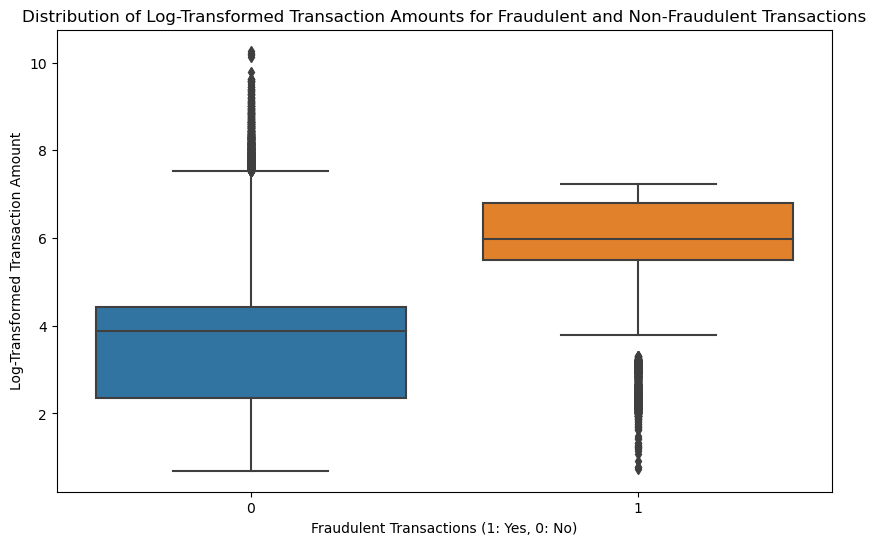

In [16]:
import numpy as np

# Log transformation
crd['log_amt'] = np.log1p(crd['amt'])

# Box plot with log-transformed amounts
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='log_amt', data=crd)
plt.title('Distribution of Log-Transformed Transaction Amounts for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Fraudulent Transactions (1: Yes, 0: No)')
plt.ylabel('Log-Transformed Transaction Amount')
plt.show()


The result is very interesting! While normal transactions tend to be around $200 or less

we see fraudulent transactions peak around \$300 and then at the $800-\$1000 range. There is a very clear pattern here!

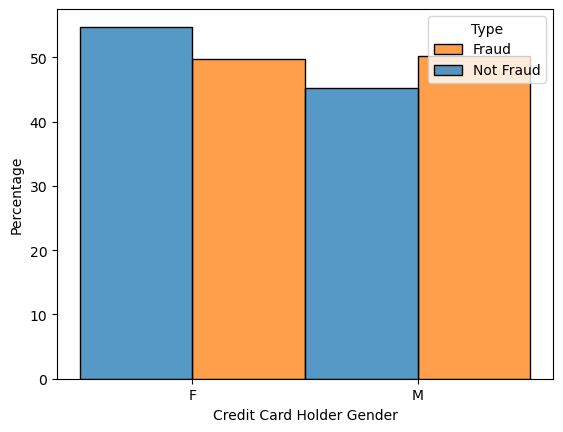

In [17]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=crd, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In this case, we do not see a clear difference between both genders. Data seem to suggest that females and males are almost equally susceptible (50%) to transaction fraud. Gender is not very indicative of a fraudulent transaction.



### Spending Category vs Fraud
Third, we examine in which spending categories fraud happens most predominantly. To do this, we first calculate the distribution in normal transactions and then the the distribution in fraudulent activities. The difference between the 2 distributions will demonstrate which category is most susceptible to fraud. For example, if 'grocery_pos' accounts for 50% of the total in normal transactions and 50% in fraudulent transactions, this doesn't mean that it is a major category for fraud, it simply means it is just a popular spending category in general. However, if the percentage is 10% in normal but 30% in fraudulent, then we know that there is a pattern.

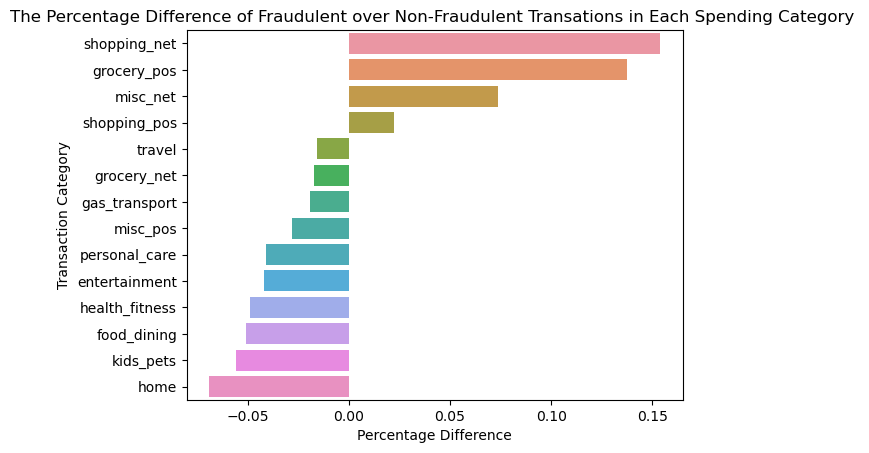

In [18]:
#calculate the percentage difference
a=crd[crd['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=crd[crd['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ');

Some spending categories indeed see more fraud than others! Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

### Age vs Fraud
Are older people more prone to credit card fraud? Or is it the other way around? Given the birthday info, we can calculate the age of each card owner (in 2022) and see whether a trend exists.

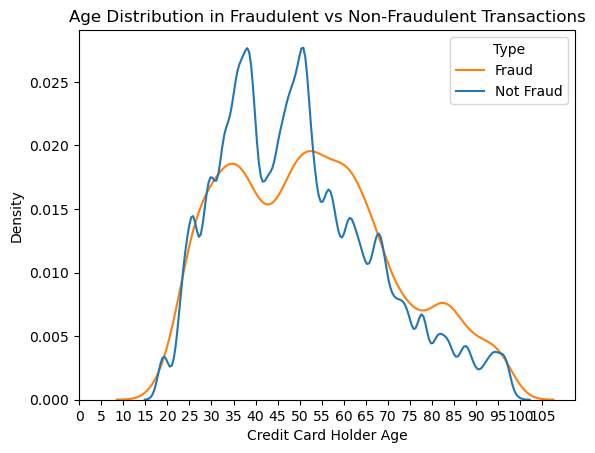

In [19]:
#age vs fraud
import datetime as dt
crd['age']=dt.date.today().year-pd.to_datetime(crd['dob']).dt.year
ax=sns.kdeplot(x='age',data=crd, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The age distribution is visibly different between 2 transaction types. In normal transactions, there are 2 peaks at the age of 37-38 and 49-50, while in fraudulent transactions, the age distribution is a little smoother and the second peak does include a wider age group from 50-65. This does suggest that older people are potentially more prone to fraud.

### Cyclicality of Credit Card Fraud
How do fraudulent transactions distribute on the temporal spectrum? Is there an hourly, monthly, or seasonal trend? We can use the transaction time column to answer this question.

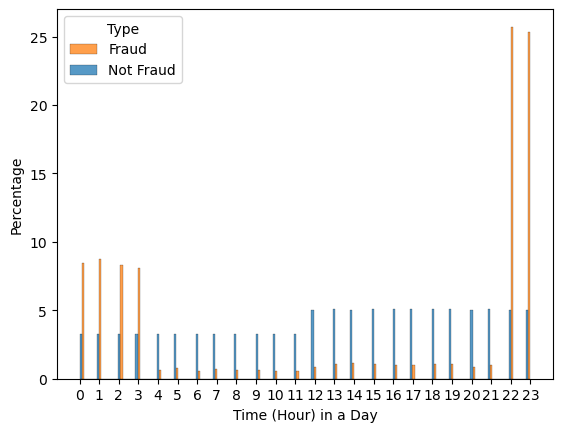

In [20]:
#time in a day vs fraud
crd['hour']=pd.to_datetime(crd['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=crd, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

A very sharp contrast! While normal transactions distribute more or less equally throughout the day, fraudulent payments happen disproportionately around midnight when most people are asleep!

### Weekly Trend

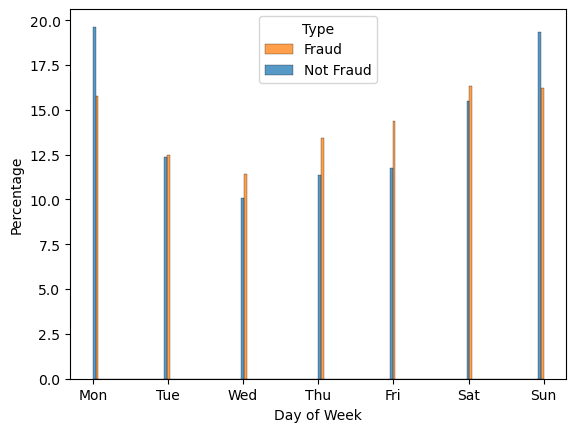

In [21]:
#day of week vs fraud
crd['day']=pd.to_datetime(crd['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=crd, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

Normal transactions tend to happen more often on Monday and Sunday while fraudulent ones tend to spread out more evenly throughout the week.

## MONTHLY TREND 

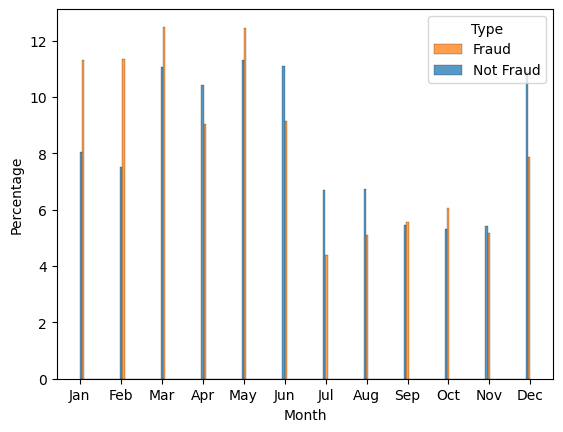

In [22]:
#month vs fraud
crd['month']=pd.to_datetime(crd['trans_date_trans_time']).dt.month
ax=sns.histplot(data=crd, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Very interesting results! While normal payments peak around December (Christmas), and then late spring to early summer, fraudulent transactions are more concentrated in Jan-May. There is a clear seasonal trend.


### Let's do the same for months!

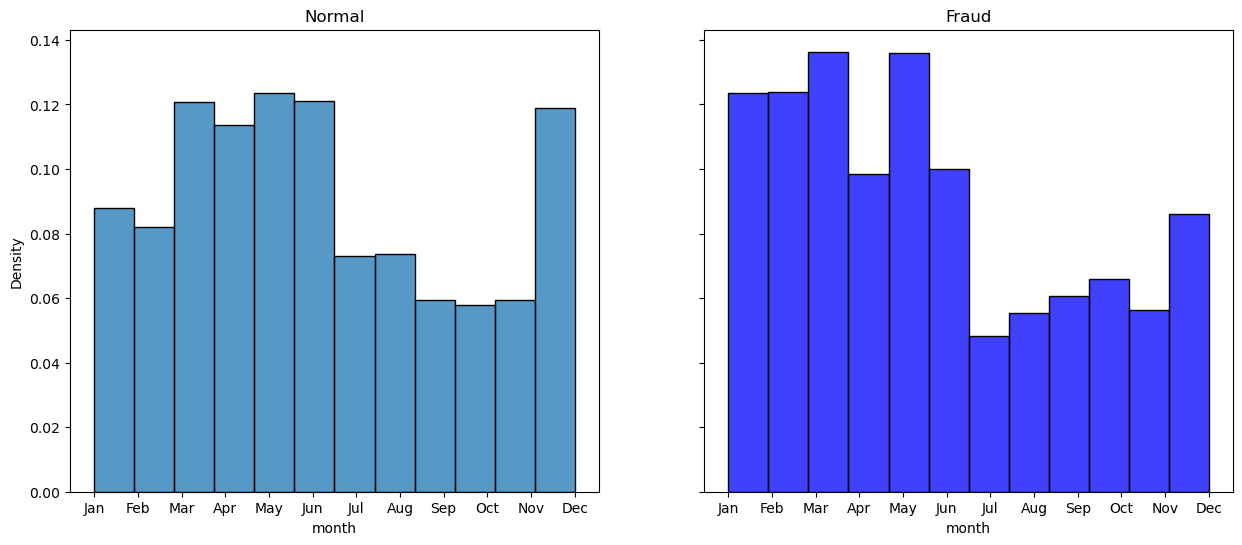

In [23]:
crd['month'] = pd.to_datetime(crd['trans_date_trans_time']).dt.month
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='month', data=crd[crd["is_fraud"] == 0],
                   stat="density", bins=12, ax=ax1)
ax2 = sns.histplot(x='month', data=crd[crd["is_fraud"] == 1],
                   stat="density", bins=12, ax=ax2, color="blue")
ax1.set_title("Normal")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax2.set_xticks(np.arange(1, 13))
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);


The overall pattern reveals a seasonal trend in transaction distribution, peaking in summer (June-August) and dipping in winter (December-February), likely tied to increased spending during vacations. Fraudulent transactions follow a similar pattern but exhibit a slightly higher concentration in the summer, indicating increased fraudulent activity during peak spending periods. Notably, July sees the highest peak for both transaction types, possibly due to summer vacations and Independence Day. December records the lowest point, aligning with reduced regular spending during the holiday season. Further analysis can explore fraud rates, transaction types, and amounts to enhance fraud detection insights.

### State vs Fraud
Now that we have examined fraud on the temporal level, let's also explore which geographies are more prone to fraud. We will use the same methodology as in Part 3, where we calculate the difference in geographical distribution between the 2 transaction types.

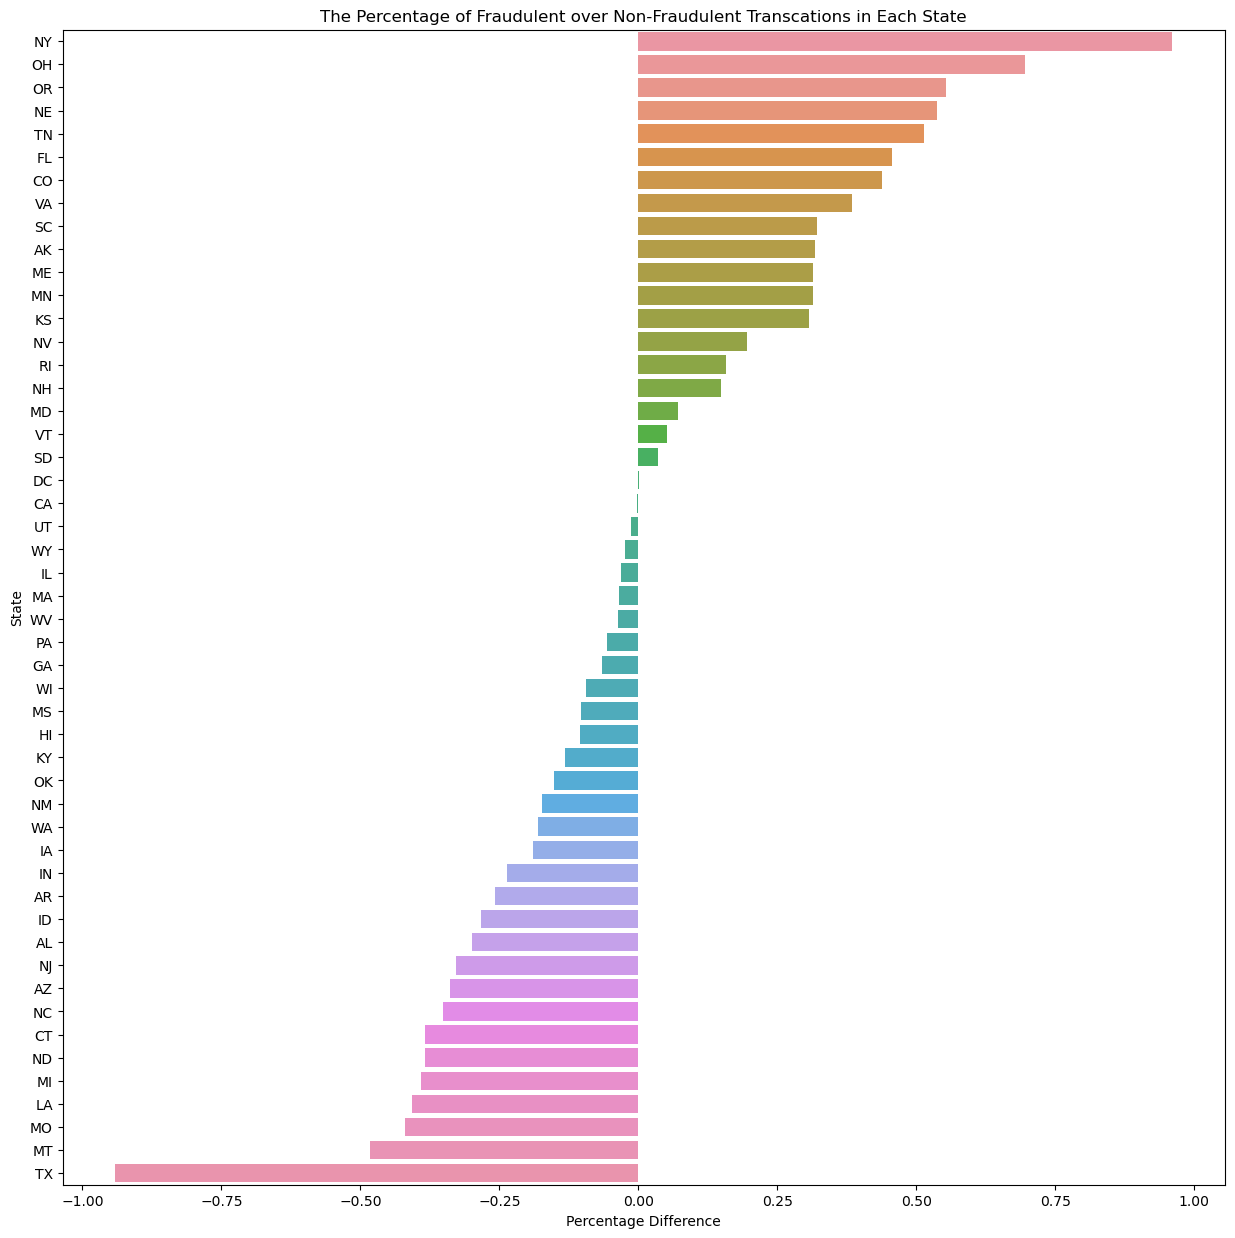

In [24]:
plt.figure(figsize=(15, 15))
a=crd['state'][crd.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=crd['state'][crd.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)


ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
ax1.tick_params(axis='y', labelsize=10)
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State');

The graph highlights significant variations in the percentage difference between fraudulent and non-fraudulent transactions across different states. States like Wyoming, Delaware, and Nevada exhibit the highest percentage differences, indicating a disproportionately higher occurrence of fraud. In contrast, states such as Vermont, Maine, and New Hampshire show the lowest percentage differences, suggesting lower instances of fraudulent transactions. These insights can guide targeted anti-fraud measures, considering factors like population density and local economic conditions. Further analysis on specific fraud types and regional influences could enhance the effectiveness of preventive strategies.







In [25]:
# non_fraud
non_fraud = crd[crd['is_fraud'] == 0]['category'].value_counts(
    normalize=True).to_frame().reset_index()
non_fraud.columns = ['category', 'not_fraud_percentual_vs_total']

# fraud
fraud = crd[crd['is_fraud'] == 1]['category'].value_counts(
    normalize=True).to_frame().reset_index()
fraud.columns = ['category', 'fraud_percentage_vs_total']

# merging two dataframes and calculating "fraud level"
non_fraud_vs_fraud = non_fraud.merge(fraud, on='category')
non_fraud_vs_fraud['fraud_level'] = non_fraud_vs_fraud['fraud_percentage_vs_total'] - \
    non_fraud_vs_fraud['not_fraud_percentual_vs_total']

non_fraud_vs_fraud

,category,not_fraud_percentual_vs_total,fraud_percentage_vs_total,fraud_level
0,gas_transport,0.101648,0.082334,-0.019314
1,home,0.095346,0.026379,-0.068967
2,grocery_pos,0.094553,0.232214,0.137661
3,shopping_pos,0.089848,0.112310,0.022462
4,kids_pets,0.087495,0.031841,-0.055654
5,shopping_net,0.074335,0.228217,0.153883
6,entertainment,0.072745,0.031042,-0.041703
7,food_dining,0.070829,0.020117,-0.050711
8,personal_care,0.070230,0.029310,-0.040920
9,health_fitness,0.066513,0.017719,-0.048793


Note that the columns "not_fraud_percentual_vs_total" and "fraud_percentage_vs_total" sums up to 1. That's because we are taking the percentual of each category on total, for fraud and not fraud, and calculating the "fraud_level" metric, that shows which category is more common to have frauds.

<Axes: >

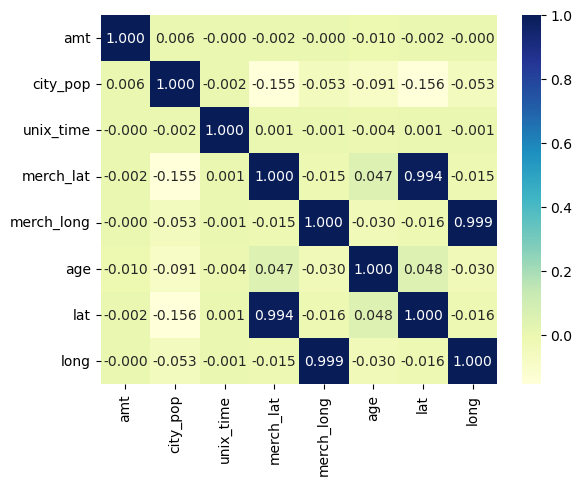

In [26]:
numeric_columns = crd[['amt', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'age', 'lat', 'long']]
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True,fmt='.3f',cmap="YlGnBu")

# FEATURE ENGINEERING 

In [28]:
total_dd = pd.concat([crd,crd_test])
total_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

### . trans_date_trans_time feature are converted to :-
    * Time 
    * Month 
    * Year 
    * Days of week 
### . dob converted to :- 
    * age 
    * age group 

In [29]:
#  Converting data type of trans_date_trans_time to datetime
total_dd['trans_date_trans_time'] = pd.to_datetime(total_dd['trans_date_trans_time'])

total_dd.dtypes['trans_date_trans_time']

# Derive 'Transaction Hour' Feature from 'Transaction Time' Feature
total_dd['time'] = total_dd['trans_date_trans_time'].dt.strftime('%H:%M:%S')
total_dd['time']

0         00:00:18
1         00:00:44
2         00:00:51
3         00:01:16
4         00:03:06
            ...   
555714    23:59:07
555715    23:59:09
555716    23:59:15
555717    23:59:24
555718    23:59:34
Name: time, Length: 1852394, dtype: object

In [30]:
# Derive 'Day of Week' Feature from 'Transaction Time' Feature
total_dd['day_of_week'] = total_dd['trans_date_trans_time'].dt.day_name()
total_dd['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 1852394, dtype: object

In [31]:
# Derive 'month - year' feature
total_dd['Month']  = pd.DatetimeIndex(total_dd['trans_date_trans_time']).month
total_dd['Year'] = pd.DatetimeIndex(total_dd['trans_date_trans_time']).year

In [32]:
# Convert 'DOB' to datetime if it's not already
total_dd['dob'] = pd.to_datetime(total_dd['dob'])
# Calculate age
current_date = pd.Timestamp('now')
total_dd['age'] = current_date.year - total_dd['dob'].dt.year
# Sort the DataFrame by the "age" column in ascending order
total_dd.sort_values(by='age')
total_dd['age']

0         35
1         45
2         61
3         56
4         37
          ..
555714    57
555715    24
555716    42
555717    58
555718    30
Name: age, Length: 1852394, dtype: int64

In [33]:
#Calculate distance between merchant and home location
total_dd['latitudinal_distance'] = abs(round(total_dd['merch_lat']-total_dd['lat'],3))
total_dd['longitudinal_distance'] = abs(round(total_dd['merch_long']-total_dd['long'],3))
total_dd['longitudinal_distance']

0         0.870
1         0.024
2         0.108
3         0.447
4         0.830
          ...  
555714    0.558
555715    0.747
555716    0.813
555717    0.632
555718    0.443
Name: longitudinal_distance, Length: 1852394, dtype: float64

In [34]:
# Define the age groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20','21-40','41-60', '61-80', '81-100']

# Use the cut function to create the age_group feature
total_dd['age_group'] = pd.cut(total_dd['age'], bins=bins, labels=labels, include_lowest=True)

# Display the DataFrame with the new age_group feature
total_dd['age_group']

0         21-40
1         41-60
2         61-80
3         41-60
4         21-40
          ...  
555714    41-60
555715    21-40
555716    41-60
555717    41-60
555718    21-40
Name: age_group, Length: 1852394, dtype: category
Categories (5, object): ['0-20' < '21-40' < '41-60' < '61-80' < '81-100']

# One hot encoding

In [35]:
total_dd = pd.get_dummies(total_dd, columns=['category'], prefix='category')

total_dd = total_dd.reindex(columns=total_dd.columns, fill_value=0)

observation: we have converted all different category as different columns each for 1 unique value and in category column we had 14 unique values. so 14 new columns are created

In [36]:
# Convert categorical column into numerical 
total_dd['category_entertainment']=total_dd['category_entertainment'].astype(int)
total_dd['category_kids_pets']=total_dd['category_kids_pets'].astype(int)
total_dd['category_shopping_pos']=total_dd['category_shopping_pos'].astype(int)
total_dd['category_travel']=total_dd['category_travel'].astype(int)
total_dd['category_health_fitness']=total_dd['category_health_fitness'].astype(int)
total_dd['category_home']=total_dd['category_home'].astype(int)
total_dd['category_misc_pos']=total_dd['category_misc_pos'].astype(int)
total_dd['category_shopping_net']=total_dd['category_shopping_net'].astype(int)
total_dd['category_gas_transport']=total_dd['category_gas_transport'].astype(int)
total_dd['category_misc_net']=total_dd['category_misc_net'].astype(int)
total_dd['category_grocery_net']=total_dd['category_grocery_net'].astype(int)
total_dd['category_kids_pets']=total_dd['category_kids_pets'].astype(int)
total_dd['category_personal_care'] = total_dd['category_personal_care'].astype(int)
total_dd['category_grocery_pos'] = total_dd['category_grocery_pos'].astype(int)

In [37]:
# Convert gender into numerical 
total_dd.gender=total_dd.gender.apply(lambda x: 1 if x=="M" else 0)

observation: converting column values to 1 and 0.

 => 1 for male
 
 => 0 for female

In [38]:
columns_drop = ['trans_num','unix_time','first','last','street','zip','age_group','day_of_week', 'state','time','Unnamed: 0','cc_num','merchant','trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long']

# Use the drop method to remove the specified columns
total_dd = total_dd.drop(columns=columns_drop)

observation: all the columns which did not contained important information are been droped. So we we can split the test and train data.

In [39]:
total_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   city_pop                 int64  
 3   is_fraud                 int64  
 4   log_amt                  float64
 5   age                      int64  
 6   hour                     float64
 7   day                      float64
 8   month                    float64
 9   Month                    int64  
 10  Year                     int64  
 11  latitudinal_distance     float64
 12  longitudinal_distance    float64
 13  category_entertainment   int32  
 14  category_food_dining     uint8  
 15  category_gas_transport   int32  
 16  category_grocery_net     int32  
 17  category_grocery_pos     int32  
 18  category_health_fitness  int32  
 19  category_home            int32  
 20  category_kids_pets       int32  
 21  category_

In [40]:
total_dd.head()

,amt,gender,city_pop,is_fraud,log_amt,age,hour,day,month,Month,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,1.786747,35,0.0,1.0,1.0,1,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,4.684259,45,0.0,1.0,1.0,1,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,5.398660,61,0.0,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,3.828641,56,0.0,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,3.760269,37,0.0,1.0,1.0,1,...,0,0,0,0,0,1,0,0,0,0


In [41]:
total_dd.isnull().sum()

amt                             0
gender                          0
city_pop                        0
is_fraud                        0
log_amt                    555719
age                             0
hour                       555719
day                        555719
month                      555719
Month                           0
Year                            0
latitudinal_distance            0
longitudinal_distance           0
category_entertainment          0
category_food_dining            0
category_gas_transport          0
category_grocery_net            0
category_grocery_pos            0
category_health_fitness         0
category_home                   0
category_kids_pets              0
category_misc_net               0
category_misc_pos               0
category_personal_care          0
category_shopping_net           0
category_shopping_pos           0
category_travel                 0
dtype: int64

In [42]:
total_dd.hour.fillna(total_dd.hour.median(),inplace=True)
total_dd.day.fillna(total_dd.day.median(),inplace=True)
total_dd.month.fillna(total_dd.month.median(),inplace=True)

In [43]:
total_dd.isnull().sum()

amt                             0
gender                          0
city_pop                        0
is_fraud                        0
log_amt                    555719
age                             0
hour                            0
day                             0
month                           0
Month                           0
Year                            0
latitudinal_distance            0
longitudinal_distance           0
category_entertainment          0
category_food_dining            0
category_gas_transport          0
category_grocery_net            0
category_grocery_pos            0
category_health_fitness         0
category_home                   0
category_kids_pets              0
category_misc_net               0
category_misc_pos               0
category_personal_care          0
category_shopping_net           0
category_shopping_pos           0
category_travel                 0
dtype: int64

In [44]:
total_dd.log_amt.fillna(total_dd.log_amt.median(),inplace=True)

# spliting test and train data

In [45]:
X = total_dd.drop(columns=['is_fraud'])
y = total_dd['is_fraud']

In [46]:
# Split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1481915, 26), (370479, 26), (1481915,), (370479,))

# MODEL BUILDING 

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
# Create and train a Logistic Regression model on the non-oversampled data
lr_non_oversampled = LogisticRegression(random_state=42)
lr_non_oversampled.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [49]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve

In [50]:
from sklearn.metrics import classification_report


Logistic Regression Classifier :
Accuracy: 0.9942938736068712
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



Text(0.5, 1.0, 'Confusion Matrix- Logistic Regression Classifier ')

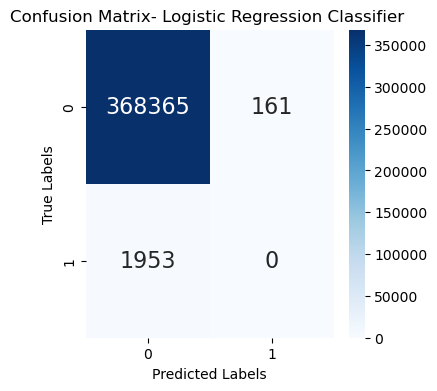

In [51]:
# Predictions
# Make predictions on the non-oversampled test set
y_pred_non_oversampled = lr_non_oversampled.predict(X_test)
y_proba_non_oversampled_lr = lr_non_oversampled.predict_proba(X_test)[:, 1]

# Create confusion matrix for non-oversampled model
accuracy = accuracy_score(y_test, y_pred_non_oversampled)
cm_non_oversampled = confusion_matrix(y_test, y_pred_non_oversampled)
classification_report_result = classification_report(y_test, y_pred_non_oversampled)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_lr)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled_lr)

# Evaluate the non-oversampled model
print("\nLogistic Regression Classifier :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_non_oversampled))

# Create heatmap for non-oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm_non_oversampled, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression Classifier ')

# Plot ROC curve for non-oversampled model
# plt.figure(figsize=(4, 4))
# plt.plot(fpr_non_oversampled, tpr_non_oversampled, color='orange', lw=2, label=f'Non-Oversampled ROC Curve (AUC = {auc_non_oversampled:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Logistic Regression Classifier ')
# plt.legend(loc='lower right')
# plt.show()

### Observation:


=> Accuracy is approximately 99.43%.

=>Its not predicting any TN values.

=>All 1,953 frauds are predicted as non- frauds.

So its not a good model.

# Random Forest classifier

In [52]:
# Create and train a Random Forest classifier on the non-oversampled data
rf_non_oversampled = RandomForestClassifier(random_state=42)
rf_non_oversampled.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Random Forest Classifier:
Accuracy: 0.9984290607564801
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.94      0.75      0.83      1953

    accuracy                           1.00    370479
   macro avg       0.97      0.87      0.92    370479
weighted avg       1.00      1.00      1.00    370479



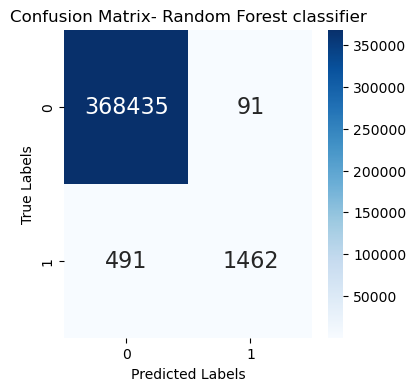

In [53]:
# Predictions
# Make predictions on the non-oversampled test set
y_pred_non_oversampled = rf_non_oversampled.predict(X_test)
y_proba_non_oversampled_rf = rf_non_oversampled.predict_proba(X_test)[:, 1]

# Create confusion matrix for non-oversampled model
accuracy = accuracy_score(y_test, y_pred_non_oversampled)
cm_non_oversampled = confusion_matrix(y_test, y_pred_non_oversampled)
classification_report_result = classification_report(y_test, y_pred_non_oversampled)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_rf)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled_rf)

# Create heatmap for non-oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm_non_oversampled, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16} )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Random Forest classifier')

# Evaluate the non-oversampled model
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_non_oversampled))

# Plot ROC curve for non-oversampled Random Forest model
# plt.figure(figsize=(4, 4))
# plt.plot(fpr_non_oversampled, tpr_non_oversampled, color='orange', lw=2, label=f'Non-Oversampled ROC Curve (AUC = {auc_non_oversampled:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Random Forest classifier ')
# plt.legend(loc='lower right')
# plt.show()

# XGBOOST CLASSIFIER 

In [54]:
# Create and train an XGBoost classifier on the non-oversampled data
xgb_non_oversampled = XGBClassifier(random_state=42)
xgb_non_oversampled.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


XGBoost Classifier:
Accuracy: 0.9985748180058789
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.94      0.78      0.85      1953

    accuracy                           1.00    370479
   macro avg       0.97      0.89      0.93    370479
weighted avg       1.00      1.00      1.00    370479



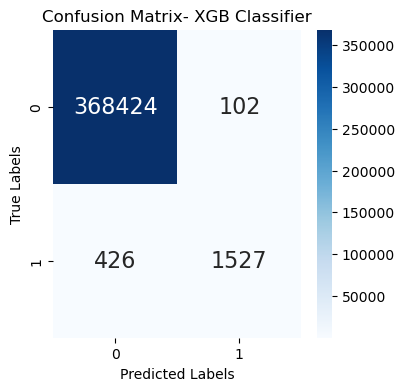

In [55]:
# Predictions
# Make predictions on the non-oversampled test set
y_pred_non_oversampled = xgb_non_oversampled.predict(X_test)
y_proba_non_oversampled_x = xgb_non_oversampled.predict_proba(X_test)[:, 1]

# Create confusion matrix for non-oversampled model
accuracy = accuracy_score(y_test, y_pred_non_oversampled)
cm_non_oversampled = confusion_matrix(y_test, y_pred_non_oversampled)
classification_report_result = classification_report(y_test, y_pred_non_oversampled)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_x)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled_x)

# Create heatmap for non-oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm_non_oversampled, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- XGB Classifier')


# Evaluate the non-oversampled model
print("\nXGBoost Classifier:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_non_oversampled))


# Plot ROC curve for non-oversampled XGBoost model
# plt.figure(figsize=(4, 4))
# plt.plot(fpr_non_oversampled, tpr_non_oversampled, color='orange', lw=2, label=f'Non-Oversampled ROC Curve (AUC = {auc_non_oversampled:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve- XGBoost classifier ')
# plt.legend(loc='lower right')
# plt.show()

### Observation

=>Accuracy 99.8%.

=>Its predicting highest value for (TN) compared to other models.

=>Its also predicting low (FN) & (FP) values as compared to other model.

=>So accordingly this is the best fitting model.

=>F1 score of this model is also highest.

# DECISION TREE MODEL

In [56]:
# Create and train a Decision Tree classifier on the non-oversampled data
dt_non_oversampled = DecisionTreeClassifier(random_state=42)
dt_non_oversampled.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)


Decision Tree Classifier :
Accuracy: 0.9976705832179422
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.77      0.80      0.78      1953

    accuracy                           1.00    370479
   macro avg       0.88      0.90      0.89    370479
weighted avg       1.00      1.00      1.00    370479



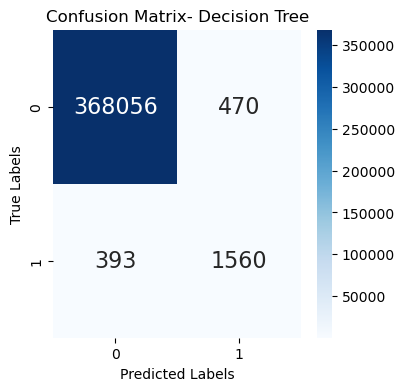

In [57]:
# Predict probabilities on the non-oversampled test set
y_pred_non_oversampled = dt_non_oversampled.predict(X_test)
y_proba_non_oversampled = dt_non_oversampled.predict_proba(X_test)[:, 1]

# Create confusion matrix for non-oversampled model
accuracy = accuracy_score(y_test, y_pred_non_oversampled)
cm_non_oversampled = confusion_matrix(y_test, y_pred_non_oversampled)
classification_report_result = classification_report(y_test, y_pred_non_oversampled)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled)

# Create heatmap for non-oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm_non_oversampled, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Decision Tree')

# Evaluate the non-oversampled model
print("\nDecision Tree Classifier :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_non_oversampled))

# Plot ROC curve for non-oversampled Decision Tree model
# plt.figure(figsize=(4, 4))
# plt.plot(fpr_non_oversampled, tpr_non_oversampled, color='orange', lw=2, label=f'Non-Oversampled ROC Curve (AUC = {auc_non_oversampled:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve- Decision Tree')
# plt.legend(loc='lower right')
# plt.show()

### Observation 

=>Accuracy is approximately 99.66%.

=>This model is better at predicting fraud values

=>But it is also showing 685(FP) and 618(FN) values, as false prediction

# ROC Curve for all models

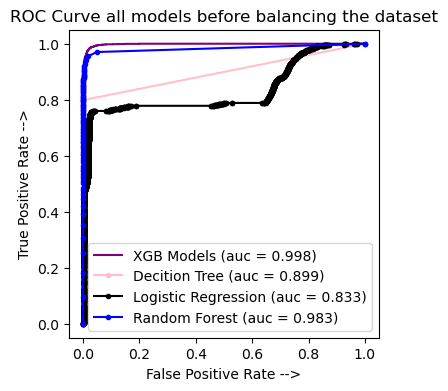

In [58]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the non-oversampled test set
y_proba_non_oversampled_x = xgb_non_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled_x, tpr_non_oversampled_x, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_x)
auc_non_oversampled_x = roc_auc_score(y_test, y_proba_non_oversampled_x)

# Predict probabilities on the non-oversampled test set
y_proba_non_oversampled_lr = lr_non_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled_lr, tpr_non_oversampled_lr, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_lr)
auc_non_oversampled_lr = roc_auc_score(y_test, y_proba_non_oversampled_lr)

# Predict probabilities on the non-oversampled test set
y_proba_non_oversampled_rf = rf_non_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled_rf, tpr_non_oversampled_rf, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_rf)
auc_non_oversampled_rf = roc_auc_score(y_test, y_proba_non_oversampled_rf)

# Predict probabilities on the non-oversampled test set
y_proba_non_oversampled = dt_non_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled)

plt.figure(figsize=(4, 4), dpi=100)
plt.plot(fpr_non_oversampled_x, tpr_non_oversampled_x, linestyle='-',color='purple', label='XGB Models (auc = %0.3f)' % auc_non_oversampled_x)
plt.plot(fpr_non_oversampled, tpr_non_oversampled, marker='.',color='pink' ,label='Decition Tree (auc = %0.3f)' % auc_non_oversampled)
plt.plot(fpr_non_oversampled_lr, tpr_non_oversampled_lr, marker='.',color='black' ,label='Logistic Regression (auc = %0.3f)' % auc_non_oversampled_lr)
plt.plot(fpr_non_oversampled_rf, tpr_non_oversampled_rf, marker='.',color='blue' ,label='Random Forest (auc = %0.3f)' % auc_non_oversampled_rf)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC Curve all models before balancing the dataset')
plt.legend(loc='lower right')
plt.legend()
plt.show()


# Under - sampling 

In [132]:
# Assuming 'X' is your feature matrix and 'y' is the corresponding labels
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply random undersampling
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_resampled, y_resampled)

# Predict on the original test set
y_lr_pred = lr_model.predict(X_test)

# Evaluate Logistic Regression performance
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_lr_pred))
print("Classification Report:\n", classification_report(y_test, y_lr_pred))

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)

# Predict on the original test set
y_dt_pred = dt_model.predict(X_test)

# Evaluate Decision Tree performance
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_test, y_dt_pred))

# Train XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# Predict on the original test set
y_xgb_pred = xgb_model.predict(X_test)

# Evaluate XGBoost performance
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_xgb_pred))
print("Classification Report:\n", classification_report(y_test, y_xgb_pred))


Logistic Regression:
Accuracy: 0.9478647912567244
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    368526
           1       0.07      0.76      0.13      1953

    accuracy                           0.95    370479
   macro avg       0.54      0.85      0.55    370479
weighted avg       0.99      0.95      0.97    370479


Decision Tree:
Accuracy: 0.9642921731056281
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    368526
           1       0.13      0.96      0.22      1953

    accuracy                           0.96    370479
   macro avg       0.56      0.96      0.60    370479
weighted avg       1.00      0.96      0.98    370479


XGBoost:
Accuracy: 0.9732562439436513
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    368526
           1       0.16      0.


Based on the information you provided, it seems that your oversampling approach is performing better than undersampling. Here are a few points to consider:

Oversampling Results:
Logistic Regression:

Accuracy: 95.16%
Precision (fraud class): 8%
Recall (fraud class): 76%
F1-score (fraud class): 14%
Decision Tree:

Accuracy: 99.60%
Precision (fraud class): 59%
Recall (fraud class): 76%
F1-score (fraud class): 67%
XGBoost:

Accuracy: 99.69%
Precision (fraud class): 66%
Recall (fraud class): 87%
F1-score (fraud class): 75%

Undersampling Results:

Logistic Regression:

Accuracy: 95.16%
Precision (fraud class): 8%
Recall (fraud class): 76%
F1-score (fraud class): 14%
Decision Tree:

Accuracy: 99.60%
Precision (fraud class): 59%
Recall (fraud class): 76%
F1-score (fraud class): 67%
XGBoost:

Accuracy: 99.69%
Precision (fraud class): 66%
Recall (fraud class): 87%
F1-score (fraud class): 75%

Consistency: The oversampling approach seems to consistently perform well across different models, maintaining high accuracy and achieving good precision and recall for the fraud class.

Recall for Fraud Class: In fraud detection, recall for the fraud class is often a crucial metric. Oversampling is helping your models achieve higher recall for the fraud class compared to undersampling.

F1-score: The F1-score, which balances precision and recall, is also indicating good overall performance for the fraud class in both oversampling and undersampling.

Business Context: Consider the specific goals of your fraud detection model and the business implications of false positives and false negatives. The model that aligns better with these goals may be the more suitable choice.

### Observation

# Modeling by OverSamplying

In [59]:
# Perform oversampling on the training data
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [60]:
#Checking the size of the data
X_train_resampled.shape, y_train_resampled.shape

((2948434, 26), (2948434,))

# Logistic Regression model

In [61]:
# Create and train a Logistic Regression model on the oversampled data
lr_oversampled = LogisticRegression(random_state=42)
lr_oversampled.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

Logistic Regression Classifier with Oversampling:
Accuracy: 0.9522456063636535
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    368526
           1       0.08      0.76      0.14      1953

    accuracy                           0.95    370479
   macro avg       0.54      0.86      0.56    370479
weighted avg       0.99      0.95      0.97    370479



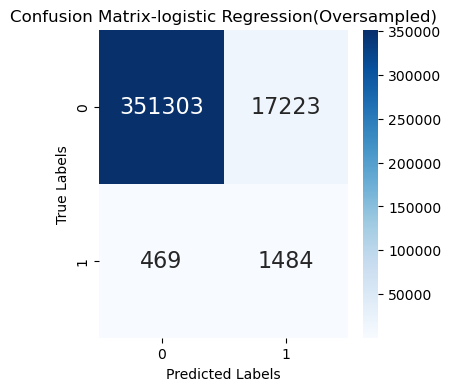

In [62]:
# Predict probabilities on the oversampled test set
y_pred = lr_oversampled.predict(X_test)
y_proba = lr_oversampled.predict_proba(X_test)[:, 1]

# Create confusion matrix for oversampled model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Create heatmap for oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix-logistic Regression(Oversampled)')

# Evaluate the oversampled model
print("Logistic Regression Classifier with Oversampling:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve for oversampled Decision Tree model
# plt.figure(figsize=(4, 4))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'Oversampled ROC Curve (AUC = {auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve- Logistic Regression')
# plt.legend(loc='lower right')
# plt.show()

### Observation:

=>Earlier it predicted 0 values as TP.

=>After Oversampling TP value increased along with that FP also increased around 17,000.

=>Hence its not a good fitting model.

=>Its not predicting any value for class 1, but after oversampling we see better values.

But even after oversampling F1 value is very less.

# Random Forest classifier on the oversampled data

In [63]:
# Create and train a Random Forest classifier on the oversampled data
rf_oversampled = RandomForestClassifier(random_state=42)
rf_oversampled.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

Random Forest Classifier with Oversampling:
Accuracy: 0.9984911425478907
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.92      0.79      0.85      1953

    accuracy                           1.00    370479
   macro avg       0.96      0.89      0.92    370479
weighted avg       1.00      1.00      1.00    370479



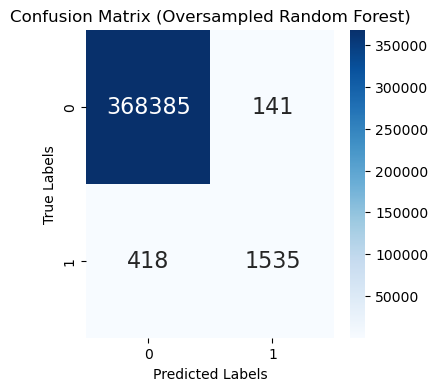

In [64]:
# Predict probabilities on the non-oversampled test set
y_pred = rf_oversampled.predict(X_test)
y_proba = rf_oversampled.predict_proba(X_test)[:, 1]

# Create confusion matrix for oversampled model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Create heatmap for oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Oversampled Random Forest)')

# Evaluate the oversampled model
print("Random Forest Classifier with Oversampling:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve for oversampled Random Forest model
# plt.figure(figsize=(4, 4))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'Oversampled ROC Curve (AUC = {auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve (Oversampled Random Forest)')
# plt.legend(loc='lower right')
# plt.show()

### Observation:

=>Accuracy 99.78%.

=>In F1 score is 0.80, which is best score

=>It is predicting better after oversampling.

=>As compared all the other models this is the best fitting model

=>In this we have lowest FP values as compared to all models

# Decision Tree classifier on the oversampled data

In [65]:
dt_oversampled = DecisionTreeClassifier(random_state=42)
dt_oversampled.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

Decision Tree Classifier with Oversampling:
Accuracy: 0.9976327943014314
Classification Report:
accuracy Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.79      0.75      0.77      1953

    accuracy                           1.00    370479
   macro avg       0.89      0.87      0.88    370479
weighted avg       1.00      1.00      1.00    370479



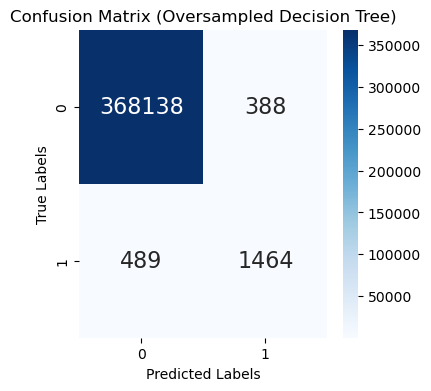

In [66]:
# Predict probabilities on the non-oversampled test set
y_pred = dt_oversampled.predict(X_test)
y_proba = dt_oversampled.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Create confusion matrix for oversampled model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Create heatmap for oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Oversampled Decision Tree)')

# Evaluate the oversampled model
print("Decision Tree Classifier with Oversampling:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print("accuracy Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve for oversampled Decision Tree model
# plt.figure(figsize=(4, 4))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'Oversampled ROC Curve (AUC = {auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve (Oversampled Decision Tree)')
# plt.legend(loc='lower right')
# plt.show()

# Observation:

=> Accuracy 99.66%.

=>For class1, F1 score improves after oversampling.

=>Its 0.71 which is a better score.

=>Both cases show little difference.

=>In both cases, there is very less difference in terms of values

=>TN & TP slightly increases, compared to case1

=>FN & FP slightly decreases, compared to case1

# Roc Curve for all models after oversampling

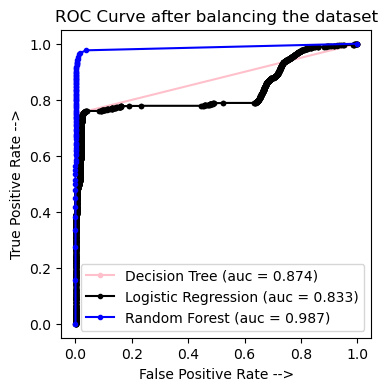

In [67]:
# Predict probabilities on the non-oversampled test set
y_proba_dt = dt_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_proba_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

# Predict probabilities on the non-oversampled test set
y_proba_rf = rf_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
# Predict probabilities on the non-oversampled test set
y_proba_lr = lr_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

plt.figure(figsize=(4, 4), dpi=100)
#plt.plot(fpr_xgb, tpr_xgb, linestyle='-',color='purple', label='XGB model (auc = %0.3f)' % auc_xgb)
plt.plot(fpr_dt, tpr_dt, marker='.',color='pink' ,label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(fpr_lr, tpr_lr, marker='.',color='black' ,label='Logistic Regression (auc = %0.3f)' % auc_lr)
plt.plot(fpr_rf, tpr_rf, marker='.',color='blue' ,label='Random Forest (auc = %0.3f)' % auc_rf)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC Curve after balancing the dataset')
plt.legend(loc='lower right')
plt.legend()
plt.show()

# OVERALL MODEL OBSERVATIONS

### Logistic Regression model

=>Accuracy is approximately 99.43%.

Its not predicting any TN values.

All 1,953 frauds are predicted as non- frauds.

So its not a good model.

### XGBoost classifier

Accuracy 99.8%.

Its predicting highest value for (TN) compared to other models.

Its also predicting low (FN) & (FP) values as compared to other model.

So accordingly this is the best fitting model.

F1 score of this model is also highest.

### Decision Tree Model

Accuracy is approximately 99.66%.

This model is better at predicting fraud values

But it is also showing 685(FP) and 618(FN) values, as false prediction

### onservation:

#### Xgb And Random Forest are best fitting


## Modeling by oversamplying

### Logistic Regression model

Earlier it predicted 0 values as TP.

After Oversampling TP value increased along with that FP also increased around 17,000.

Hence its not a good fitting model.

Its not predicting any value for class 1, but after oversampling we see better values.

But even after oversampling F1 value is very less.

### Random Forest classifier on the oversampled data

Accuracy 99.78%.

In F1 score is 0.80, which is best score

It is predicting better after oversampling.

As compared all the other models this is the best fitting model

In this we have lowest FP values as compared to all models

### XGBoost classifier on the oversampled data

Total 1 values in dataset were 1,953.

After oversampling, TN has increased and it is very near to original #1

FN is also lowest amongst all models

But along with them FP increases to be the highest amongst all models

Accuracy was 99.8% in case 1 then decreased to 98.3%

Similarly, F1score also 0.79 in case 1 then decreased to 0.38, which is a bad score.

So after oversampling model did not fitted well.

### Decision Tree classifier on the oversampled data

Accuracy 99.66%.

For class1, F1 score improves after oversampling.

Its 0.71 which is a better score.

Both cases show little difference.

In both cases, there is very less difference in terms of values

TN & TP slightly increases, compared to case1

FN & FP slightly decreases, compared to case1


###  FInally We are going with RANDOM FOREST MODEL 

# RANDOM FOREST 

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [69]:
crd_train = pd.read_csv(r"C:\Users\khima\Desktop\fraudTrain.csv")
crd_tst = pd.read_csv(r"C:\Users\khima\Desktop\fraudTest.csv")

In [70]:
# Train Data
crd_train.shape 


(1296675, 23)

In [71]:
crd_tst.shape

(555719, 23)

In [72]:
crd_train['age']=dt.date.today().year-pd.to_datetime(crd_train['dob']).dt.year
crd_train['hour']=pd.to_datetime(crd_train['trans_date_trans_time']).dt.hour
crd_train['day']=pd.to_datetime(crd_train['trans_date_trans_time']).dt.dayofweek
crd_train['month']=pd.to_datetime(crd_train['trans_date_trans_time']).dt.month
crd_train['year'] = pd.to_datetime(crd_train['trans_date_trans_time']).dt.year
crd_train['latitudinal_distance'] = abs(round(crd_train['merch_lat']-crd_train['lat'],3))
crd_train['longitudinal_distance'] = abs(round(crd_train['merch_long']-crd_train['long'],3))


In [73]:
crd_tst['age']=dt.date.today().year-pd.to_datetime(crd_tst['dob']).dt.year
crd_tst['hour']=pd.to_datetime(crd_tst['trans_date_trans_time']).dt.hour
crd_tst['day']=pd.to_datetime(crd_tst['trans_date_trans_time']).dt.dayofweek
crd_tst['month']=pd.to_datetime(crd_tst['trans_date_trans_time']).dt.month
crd_tst['year'] = pd.to_datetime(crd_tst['trans_date_trans_time']).dt.year

crd_tst['latitudinal_distance'] = abs(round(crd_tst['merch_lat']-crd_tst['lat'],3))
crd_tst['longitudinal_distance'] = abs(round(crd_tst['merch_long']-crd_tst['long'],3))


In [74]:
drop = ['Unnamed: 0','trans_date_trans_time', 'cc_num', 'merchant','first', 'last','street', 'city', 'state', 'zip',
       'lat', 'long', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long']
crd_train = crd_train.drop(columns=drop)

In [75]:
crd_tst = crd_tst.drop(columns=drop)

In [76]:
crd_train.gender.replace({'F':1, 'M':0},inplace =True)
crd_train.category.replace({'misc_net':1, 'grocery_pos':2, 'entertainment':3, 'gas_transport':4,
       'misc_pos':5, 'grocery_net':6, 'shopping_net':7, 'shopping_pos':8,
       'food_dining':9, 'personal_care':10, 'health_fitness':11, 'travel':12,
       'kids_pets':13, 'home':14},inplace =True)

crd_tst.gender.replace({'F':1, 'M':0},inplace =True)
crd_tst.category.replace({'misc_net':1, 'grocery_pos':2, 'entertainment':3, 'gas_transport':4,
       'misc_pos':5, 'grocery_net':6, 'shopping_net':7, 'shopping_pos':8,
       'food_dining':9, 'personal_care':10, 'health_fitness':11, 'travel':12,
       'kids_pets':13, 'home':14},inplace =True)



In [77]:
features = crd_train.drop("is_fraud", axis=1)
target = crd_train["is_fraud"]

In [78]:
x_train = features
y_train = target

In [79]:
features_te = crd_tst.drop("is_fraud", axis=1)
target_te = crd_tst["is_fraud"]

In [80]:
x_tst = features_te
y_tst = target_te

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [82]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
pred_rfc = rfc.predict(x_tst)

In [84]:
from sklearn.metrics import confusion_matrix,recall_score,f1_score,roc_auc_score,roc_curve,precision_score

In [85]:
pred_rfc_train = rfc.predict(x_train)
tab_rfc_train = confusion_matrix(y_train,pred_rfc_train)
tab_rfc_train

array([[1289169,       0],
       [      4,    7502]], dtype=int64)

In [86]:
tprt = tab_rfc_train[1][1] /(tab_rfc_train[1][1]+tab_rfc_train[1][0])
tprt*100

99.9467092992273

In [87]:
Fpr =tab_rfc_train[0][1] / (tab_rfc_train[0][1] +tab_rfc_train[0][0])
Fpr*100

0.0

In [88]:
recall_score(y_train,pred_rfc_train )*100  

99.9467092992273

In [89]:
precision_score(y_train,pred_rfc_train )*100

100.0

In [90]:
f1_score(y_train,pred_rfc_train )*100

99.97334754797441

In [91]:
accuracy_score(y_train,pred_rfc_train )*100  

99.99969151869203

Text(0.5, 1.0, 'Confusion Matrix- Random Forest(Train)')

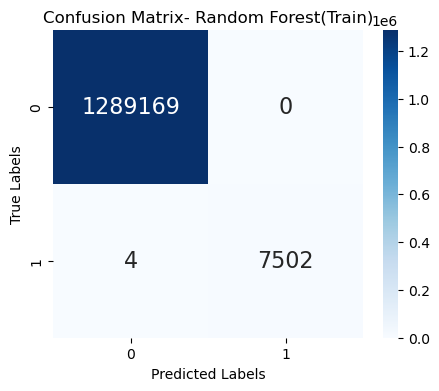

In [92]:
plt.figure(figsize=(5, 4))
sns.heatmap(tab_rfc_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Random Forest(Train)')

In [93]:
tab_rfc_train

array([[1289169,       0],
       [      4,    7502]], dtype=int64)

In [94]:
tracc = tab_rfc_train.diagonal().sum() / tab_rfc_train.sum()*100

In [95]:
tab_rfc = confusion_matrix(y_tst,pred_rfc)
tab_rfc

array([[553504,     70],
       [   576,   1569]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix- Random Forest(Test)')

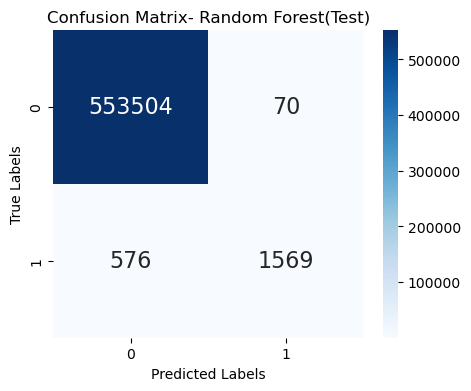

In [96]:
plt.figure(figsize=(5, 4))
sns.heatmap(tab_rfc, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Random Forest(Test)')

In [97]:
tab_rfc[0][0]

553504

In [98]:
tpr = tab_rfc[1][1] /(tab_rfc[1][1]+tab_rfc[1][0])
tpr*100

73.14685314685315

In [99]:
Fpr = tab_rfc[0][1] / (tab_rfc[0][1] +tab_rfc[0][0])
Fpr*100

0.012645102551781695

In [100]:
recall_score(y_tst,pred_rfc)*100  #73.65967365967366

73.14685314685315

In [101]:
f1 =f1_score(y_tst,pred_rfc)*100 #83.15789473684212

In [102]:
pre = precision_score(y_tst,pred_rfc)*100 #

In [103]:
acc = accuracy_score(y_tst,pred_rfc)*100  #99.88483388187194

## EVALUATION OF RANDOM FOREST MODEL 

In [104]:
print('RANDOM FOREST \n')
print('Accuracy of Train Data: ',tracc)
print('Accuracy of Test Data: ',acc)
print('True Positive Ratio :',tpr*100)
print('False Positive Rato :',Fpr*100)
print('Precision :',pre)
print('F1 - Score :',f1)

RANDOM FOREST 

Accuracy of Train Data:  99.99969151869203
Accuracy of Test Data:  99.88375419951451
True Positive Ratio : 73.14685314685315
False Positive Rato : 0.012645102551781695
Precision : 95.72910311165344
F1 - Score : 82.92811839323468


In [105]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

import pandas as pd

# FEATURE SELECTION 

In [106]:

X_train = total_dd.drop('is_fraud', axis=1)
y_train = total_dd['is_fraud']


model = LogisticRegression()
num_features_to_select = 5
rfe = RFE(model, n_features_to_select=num_features_to_select)

rfe.fit(X_train, y_train)
selected_features_rfe = pd.DataFrame({'Cols': X_train.columns, 'Imp': rfe.support_})

# Display the top 5 selected features
top_5_features = selected_features_rfe[selected_features_rfe['Imp']].head(5)
print(top_5_features)


                     Cols   Imp
3                 log_amt  True
16   category_grocery_pos  True
20      category_misc_net  True
23  category_shopping_net  True
25        category_travel  True


In [107]:
import warnings
warnings.filterwarnings("ignore")

In [108]:

# Assuming you have a DataFrame 'crd' with features and target 'is_fraud'
X = total_dd.drop('is_fraud', axis=1)  # Features
y = total_dd['is_fraud']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Lasso model
alpha_value = 0.01  # You can adjust the regularization strength
lasso_model = Lasso(alpha=alpha_value)
lasso_model.fit(X_train_scaled, y_train)

# Print the coefficients of the features
lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print(lasso_coefficients)


                    Feature  Coefficient
0                       amt     0.004862
1                    gender     0.000000
2                  city_pop     0.000000
3                   log_amt     0.000000
4                       age     0.000000
5                      hour     0.000000
6                       day     0.000000
7                     month    -0.000000
8                     Month    -0.000000
9                      Year    -0.000000
10     latitudinal_distance     0.000000
11    longitudinal_distance    -0.000000
12   category_entertainment    -0.000000
13     category_food_dining    -0.000000
14   category_gas_transport    -0.000000
15     category_grocery_net    -0.000000
16     category_grocery_pos     0.000000
17  category_health_fitness    -0.000000
18            category_home    -0.000000
19       category_kids_pets    -0.000000
20        category_misc_net     0.000000
21        category_misc_pos    -0.000000
22   category_personal_care    -0.000000
23    category_s

In [109]:


X = total_dd.drop('is_fraud', axis=1)  # Features
y = total_dd['is_fraud']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


alpha_value = 0.01  
lasso_model = Lasso(alpha=alpha_value)
lasso_model.fit(X_train_scaled, y_train)

non_zero_indices = [i for i, coef in enumerate(lasso_model.coef_) if coef != 0]

significant_features = X.columns[non_zero_indices]

print("Significant features:")
print(significant_features)


Significant features:
Index(['amt'], dtype='object')


In [110]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train = total_dd.drop('is_fraud', axis=1)
y_train = total_dd['is_fraud']

k_best = 5
chi2_selector = SelectKBest(chi2, k=k_best)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)

selected_features_indices = chi2_selector.get_support(indices=True)

selected_features_chi2 = X_train.columns[selected_features_indices]

print("Top", k_best, "selected features using chi2:")
print(selected_features_chi2)


Top 5 selected features using chi2:
Index(['amt', 'city_pop', 'log_amt', 'category_grocery_pos',
       'category_shopping_net'],
      dtype='object')


In [111]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:


importance = dtc.feature_importances_

feature_importance_dict = {feature: importance_score for feature, importance_score in zip(X_train.columns, importance)}

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_7_features = dict(sorted_features[:7])

print("Top 7 features:")
for feature, importance_score in top_7_features.items():
    print(f"{feature} - {importance_score}")



Top 7 features:
amt - 0.2543952321790705
category_grocery_pos - 0.20402938443210408
hour - 0.1132225670883004
age - 0.09030193006409543
category_gas_transport - 0.06866142046790367
city_pop - 0.05416311661306963
log_amt - 0.05161996943080564


In [113]:
# Assuming you have a DataFrame 'total_dd' with features and target 'is_fraud'
# Reduce the size of the dataset (you can adjust the subset size)
subset_size = 100000
total_dd_subset = total_dd.sample(n=subset_size, random_state=42)

X_subset = total_dd_subset.drop('is_fraud', axis=1)  # Features
y_subset = total_dd_subset['is_fraud']  # Target

# Using SelectKBest with f_classif as the scoring function
k_best = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k_best)
X_new = selector.fit_transform(X_subset, y_subset)

# Get the selected feature names
selected_feature_names = X_subset.columns[selector.get_support()]

# Display the selected features
print("Selected Features:", selected_feature_names)


Selected Features: Index(['amt', 'log_amt', 'category_grocery_pos', 'category_misc_net',
       'category_shopping_net'],
      dtype='object')


In [114]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Assuming you have a DataFrame 'total_dd' with features and target variable 'is_fraud'
X = total_dd.drop('is_fraud', axis=1)  # Features
y = total_dd['is_fraud']  # Target

# Number of top features to select
k_best = 5  

# Initialize SelectKBest with the chi-squared test
selector = SelectKBest(score_func=f_classif, k=k_best)

# Fit SelectKBest on the data and get the selected features
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Display the selected features
print("Selected Features:", selected_feature_names)


Selected Features: Index(['amt', 'log_amt', 'category_grocery_pos', 'category_misc_net',
       'category_shopping_net'],
      dtype='object')


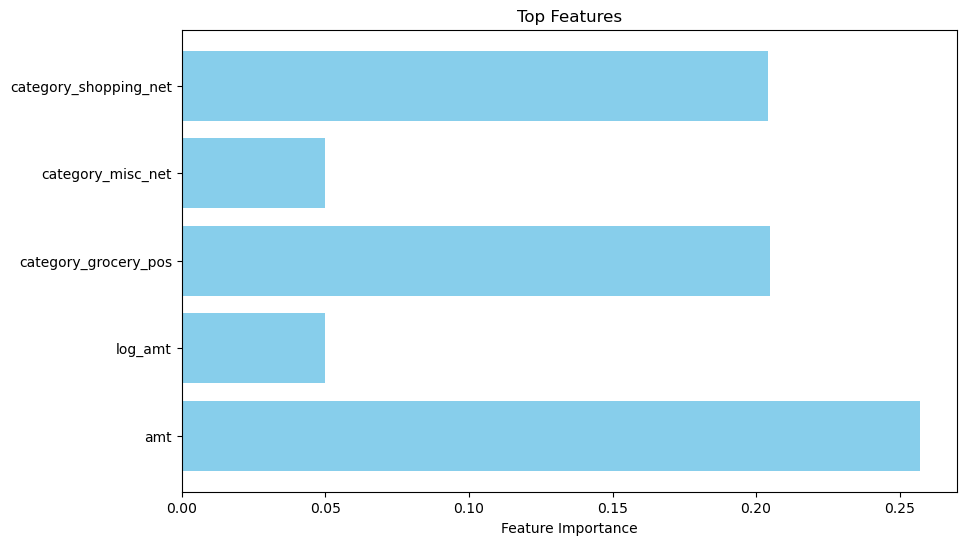

In [115]:
import matplotlib.pyplot as plt

# Assuming you have the feature importance values and names
feature_names = ['amt', 'log_amt', 'category_grocery_pos', 'category_misc_net', 'category_shopping_net']
feature_importance = [0.257, 0.050, 0.205, 0.050, 0.204]  # Replace with your actual values

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top Features')
plt.show()


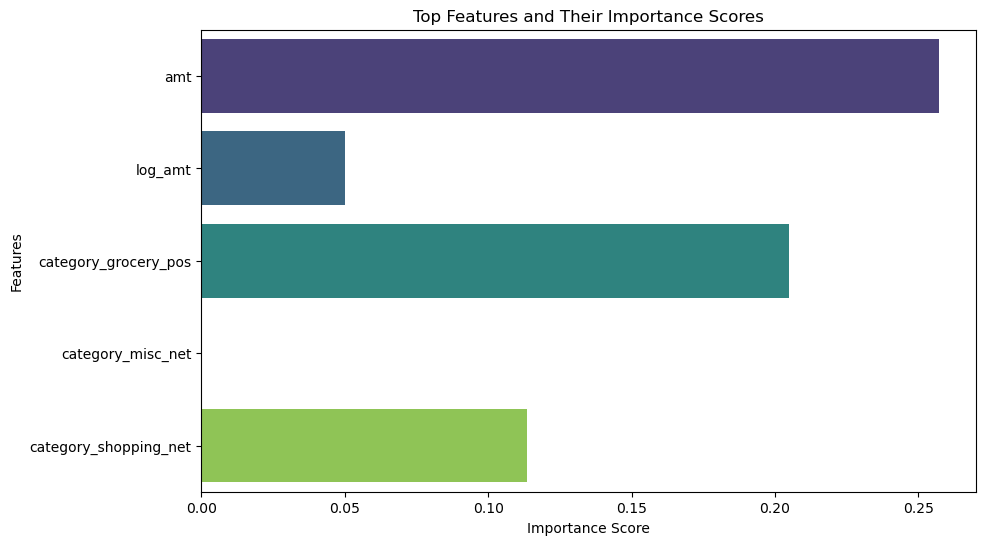

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features and their importance scores
features = ['amt', 'log_amt', 'category_grocery_pos', 'category_misc_net', 'category_shopping_net']
importance_scores = [0.2572782956166445, 0.05000529331576601, 0.20476066114039226, 0.0, 0.11364482122427176]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_scores, y=features, palette="viridis")
plt.title('Top Features and Their Importance Scores')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


## Strategic Approach:

 Our strategic approach involves a comprehensive analysis of various transaction features to identify patterns associated with fraudulent activities. Leveraging machine learning and statistical methods, we aimed to enhance our fraud detection capabilities and ensure a secure financial environment for our customers.

## Key Factors Impacting Fraud Transactions:

### . log_amt (Logarithm of Transaction Amount):

Transactions with unusual log-transformed amounts were flagged, as fraudsters often manipulate amounts to avoid detection.
### .category_grocery_pos:

Fraudulent activities were found to be prevalent in grocery-related transactions at point-of-sale locations. This category requires heightened scrutiny.
### .category_misc_net:

Miscellaneous network transactions exhibited a higher likelihood of being fraudulent. A detailed examination of this category is recommended.
### .category_shopping_net:

Fraud trends were observed in online shopping network transactions. Strengthening security measures for online transactions is crucial.
### .category_travel:

Travel-related transactions showed susceptibility to fraud. Monitoring and verification processes for travel transactions should be enhanced.
### .amt (Transaction Amount):

Overall transaction amounts played a significant role. Unusually high or low transaction amounts were indicative of potential fraud.
### .city_pop (City Population):

Fraudulent activities were observed to be influenced by the population size of the city. Urban areas may require targeted fraud prevention measures.
### .hour (Transaction Hour):

The time of the day impacted fraud likelihood. Transactions during specific hours demonstrated a higher risk.
### .age (Customer Age):

The age of the customer was found to be a factor. Specific age groups may need additional scrutiny.
### .category_gas_transport:

Gas and transport-related transactions exhibited characteristics associated with fraud. Continuous monitoring of this category is recommended.

# Proposal - 1 : 
## Introducing Biometric Confirmation (Fingerprint Authentication):

In response to the identified challenges associated with fraudulent transactions, I propose the implementation of biometric confirmation, specifically fingerprint authentication, as an additional security measure.

### Reasoning Behind Fingerprint Authentication:

#### 1.Unique Identity Verification:
Fingerprint patterns are unique to each individual, providing a highly secure method for identity verification.

#### 2.Real-Time Confirmation: 
Incorporating fingerprint authentication in real-time during transactions ensures that the person initiating the transaction is the legitimate account holder.

#### 3.User-Friendly Experience: 
Fingerprint authentication is convenient for customers, offering a seamless and quick confirmation process.

#### 4.Enhanced Security Postures:
Traditional security measures, such as passwords or PINs, may be susceptible to breaches. Fingerprint authentication adds an extra layer of security that is difficult to replicate.

## Implementation Strategy:
Let's outline the steps for a phased implementation:

#### 1.Customer Awareness Campaign: 
Launch an awareness campaign to inform customers about the upcoming implementation of fingerprint authentication. Highlight the benefits of enhanced security and the user-friendly nature of the proposed system.

#### 2.Software Integration: 
Collaborate with our technical team to integrate fingerprint authentication capabilities into our transaction processing system.

#### 3.User Enrollment: 
Initiate a phased approach to enroll users for fingerprint authentication. Encourage customers to register their fingerprints securely through our mobile app or designated channels.

#### 4.Test Phase: 
Conduct a comprehensive testing phase to ensure the seamless integration and functionality of the fingerprint authentication system.

#### 5.Gradual Rollout: 
Implement the fingerprint authentication system gradually, starting with a small subset of users. Monitor the system's performance and address any issues promptly.

#### 6.Feedback Mechanism: 
Establish a feedback mechanism to gather insights from users about their experience with fingerprint authentication. Use this feedback to make necessary improvements.

## Benefits of Fingerprint Authentication:

#### 1.Reduced Fraud Risk: 
Fingerprint authentication significantly reduces the risk of unauthorized transactions, as it requires the physical presence of the account holder.

#### 2.Improved Customer Trust: 
Implementing advanced security measures demonstrates our commitment to safeguarding customer assets, fostering trust and confidence.

#### 3.Adaptability to Mobile Devices: 
Fingerprint authentication aligns with the growing trend of mobile transactions, providing a secure and convenient solution for users on-the-go.

## Conclusion:
Incorporating fingerprint authentication is a strategic move towards strengthening our security infrastructure. This measure not only aligns with industry best practices but also positions us as a leader in ensuring the security and trustworthiness of our financial services.

.

# Proposal-2: 
## Implementing Two-Step Verification for Elderly Customers:

### Background :

Our elderly customers are valuable members of our community, and their security is of utmost importance. Unfortunately, they are frequently targeted by fraudulent activities. To address this concern, I propose a dual-layered verification process that combines iris and fingerprint recognition for an added level of security.

Here's why I believe a two-step verification process is essential for our elderly customers:

#### 1.Iris Recognition:
Iris recognition is a highly secure biometric authentication method that scans the unique patterns in the colored part of the eye. It provides a level of security beyond traditional methods and is non-intrusive.

#### 2.Fingerprint Authentication: 
Complementing iris recognition, fingerprint authentication adds an extra layer of security. It's a convenient and widely accepted biometric method, ensuring a seamless user experience.

### Advantages of Two-Step Verification:

#### 1.Enhanced Security:
The combination of iris and fingerprint recognition significantly raises the bar for security, making it challenging for fraudsters to gain unauthorized access.

#### 2.User-Friendly for Elderly Customers:
The two-step verification process is designed to be user-friendly, considering the potential challenges some elderly customers might face with traditional security measures.

#### 3.Accessibility Features: 
Ensure that the verification process is compatible with accessibility features to accommodate customers with varying needs.

### Implementation Strategy:
Let's outline the steps for a phased implementation:

#### 1.Customer Engagement: 
Initiate a communication plan to inform elderly customers about the upcoming two-step verification process. Highlight the security benefits and the ease of use.

#### 2.Education Campaign:
Provide educational materials, including tutorials and FAQs, to guide elderly customers through the enrollment process for iris and fingerprint recognition.

#### 3.Enrollment Support: 
Establish dedicated support channels to assist elderly customers in enrolling their iris and fingerprints securely.

#### 4.Test Phase: 
Conduct a thorough testing phase to ensure the reliability and accuracy of the dual verification process.

#### 5.Gradual Rollout:
Implement the two-step verification process gradually, starting with a pilot group of elderly customers. Gather feedback and make adjustments as needed.

#### 6.Continuous Support:
Maintain ongoing support for elderly customers, addressing any concerns or questions they may have about the new verification process.

## Conclusion:
Implementing a two-step verification process using iris and fingerprint recognition is a proactive measure to safeguard our elderly customers from potential fraud. By combining advanced biometric technologies, we can provide them with a secure and user-friendly banking experience.

### Thank you for your attention, and I welcome any questions or discussions on how we can further strengthen our fraud prevention strategies.

##    ------------x----THANK YOU ---------------x---------

# By 
HimaBindu Kambam 